In [19]:
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/Amy Le - PC/Documents/creditcard.csv", low_memory = False)
print(df.shape)
print(df.head())

### This dataset has 31 features. Most of the features are are results from PCA.
### Output is Class (0==normal transaction and 1== fraud transaction)



(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128

In [12]:
class_counts = df.groupby('Class').size()
print(class_counts)

###The dataset is highly unbalanced with 492 fraud transactions and 284315 normal transactions. It is clear that Class 1 is under-represented and accounts for only 0.17 % of the whole dataset. If we train our model using this dataset, the model will be inefficient and it will be trained to predict only Class 0 because it will not have sufficient training data.
### Therefore, we use the recall and F1 which relies on TP and FP as evaluation metrics
### My objective will be to maximize recall because it’s better to predict “fraud” on non fraudulent transactions than to miss fraudulent ones.

Class
0    284315
1       492
dtype: int64


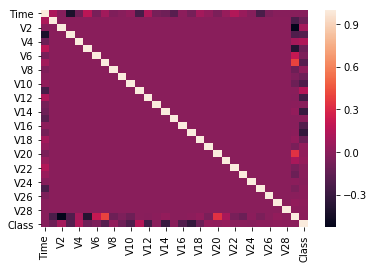

In [21]:
#Correlation Between attributes
correlations = df.corr(method='pearson')
feature_class_corr = pd.DataFrame(correlations.loc['Class', df.columns])
sns.heatmap(correlations)

###Correlation matrix shows us there is little correlation between the Time column and class so I remove it.



In [25]:
df.drop('Time', axis=1, inplace=True)


In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [24]:
### We can see that Amount column has much larger mean and standard deviation than other features. I'll rescale it
from sklearn.preprocessing import StandardScaler
df['Amount']= StandardScaler().fit_transform(df['Amount'].reshape(-1,1))


C:\Users\Amy Le - PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
X = df.columns.values.tolist()
X.remove('Class') # list of features
target = 'Class'

In [28]:
from sklearn.model_selection import train_test_split
###Make sure the frequency of positive and negative samples is approximately the same for training data as well as for test data

train_X, test_X, train_y, test_y = train_test_split(df[X], df[target], test_size=0.3)
print('% fraud: ', df[df[target] == 1].shape[0] / df.shape[0] * 100)
print('Train - size:', train_y.shape[0], ', %fraud:', train_y[train_y == 1].shape[0] / train_y.shape[0] * 100)
print('Test - size:', test_y.shape[0], ', %fraud: ', test_y[test_y == 1].shape[0] / test_y.shape[0] * 100)

% fraud:  0.1727485630620034
Train - size: 199364 , %fraud: 0.16753275415822313
Test - size: 85443 , %fraud:  0.18491860070456329


Undersampling

To overcome class imbalance, I will undersample the larger class or oversample the smaller class. Undersampling essentially means that we’ll remove most of the legitimate transactions from our data so that we have approximately the same amount of fraud and not fraud in the train/test split.


In [32]:
def undersample(data, n=1):
    positive_samples = df[df[target] == 1].copy().apply(np.random.permutation)
    negative_samples = df[df[target] == 0].copy().apply(np.random.permutation).head(positive_samples.shape[0] * n)

    undersampled_data = pd.concat([positive_samples, negative_samples])

    u_train_X, u_test_X, u_train_y, u_test_y = train_test_split(undersampled_data[X], undersampled_data[target], test_size=0.3)
    print('% fraud: ', undersampled_data[undersampled_data[target] == 1].shape[0] / undersampled_data.shape[0] * 100)
    print('Train - size:', u_train_y.shape[0], ', %fraud:', u_train_y[u_train_y == 1].shape[0] / u_train_y.shape[0] * 100)
    print('Test - size:', u_test_y.shape[0], ', %fraud: ', u_test_y[u_test_y == 1].shape[0] / u_test_y.shape[0] * 100)
    
    return u_train_X, u_test_X, u_train_y, u_test_y

u_train_X, u_test_X, u_train_y, u_test_y = undersample(df, 1)

% fraud:  50.0
Train - size: 688 , %fraud: 48.69186046511628
Test - size: 296 , %fraud:  53.04054054054054


Models

In [47]:
from sklearn import metrics

#Logistics Regression

from sklearn.linear_model import LogisticRegression

u_lr_model = LogisticRegression(C=0.0001, n_jobs=4, class_weight = 'balanced')
u_lr_model.fit(u_train_X, u_train_y)


u_lr_pred = u_lr_model.predict(u_test_X) #predicted class

print(metrics.classification_report(u_test_y, u_lr_pred))


             precision    recall  f1-score   support

          0       1.00      0.63      0.78       139
          1       0.75      1.00      0.86       157

avg / total       0.87      0.83      0.82       296



C:\Users\Amy Le - PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))


In [49]:
# Let's test on the full data

lr_pred = u_lr_model.predict(test_X) #predicted class

print(metrics.classification_report(test_y, lr_pred))

###Recall is 73% and F1-score is 84%

             precision    recall  f1-score   support

          0       1.00      0.73      0.84     85285
          1       0.01      0.97      0.01       158

avg / total       1.00      0.73      0.84     85443



In [38]:
###SVM
from sklearn.svm import SVC
svc_model = SVC(C=10)
svc_model.fit(u_train_X, u_train_y)

u_svc_pred = svc_model.predict(u_test_X) #predicted class
print(metrics.classification_report(u_test_y, u_svc_pred))

svc_pred = svc_model.predict(test_X) #predicted class
print(metrics.classification_report(test_y, svc_pred))

### Recall is 95% with F1 score is 98%


             precision    recall  f1-score   support

          0       1.00      0.96      0.98       139
          1       0.97      1.00      0.98       157

avg / total       0.98      0.98      0.98       296

             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85285
          1       0.04      0.90      0.07       158

avg / total       1.00      0.95      0.98     85443



In [40]:
###Random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(u_train_X, u_train_y)
print(metrics.classification_report(u_test_y,clf.predict(u_test_X)))
print(metrics.classification_report(test_y,clf.predict(test_X)))

### Recall and F-score are both 99%


             precision    recall  f1-score   support

          0       1.00      0.99      1.00       139
          1       0.99      1.00      1.00       157

avg / total       1.00      1.00      1.00       296

             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85285
          1       0.18      0.89      0.30       158

avg / total       1.00      0.99      0.99     85443



In [42]:
###Feature importance
importances = clf.feature_importances_
print(u_train_X.columns)
print(importances)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
[  3.09749536e-02   4.80701240e-05   2.04875964e-02   7.39830257e-02
   0.00000000e+00   1.50450796e-03   5.39857995e-02   0.00000000e+00
   4.73514043e-02   1.02529416e-01   5.09670881e-02   1.33038800e-01
   0.00000000e+00   2.49457265e-01   0.00000000e+00   3.22700932e-02
   1.35817348e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   6.69358622e-02   0.00000000e+00   0.00000000e+00   6.48770858e-04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00]


Feature ranking:
1. feature 13 (0.249457)
2. feature 16 (0.135817)
3. feature 11 (0.133039)
4. feature 9 (0.102529)
5. feature 3 (0.073983)
6. feature 20 (0.066936)
7. feature 6 (0.053986)
8. feature 10 (0.050967)
9. feature 8 (0.047351)
10. feature 15 (0.032270)
11. feature 0 (0.030975)
12. feature 2 (0.020488)
13. feature 5 (0.001505)
14. feature 23 (0.000649)
15. feature 1 (0.000048)
16. feature 4 (0.000000)
17. feature 7 (0.000000)
18. feature 28 (0.000000)
19. feature 12 (0.000000)
20. feature 27 (0.000000)
21. feature 17 (0.000000)
22. feature 18 (0.000000)
23. feature 19 (0.000000)
24. feature 21 (0.000000)
25. feature 22 (0.000000)
26. feature 24 (0.000000)
27. feature 25 (0.000000)
28. feature 26 (0.000000)
29. feature 14 (0.000000)


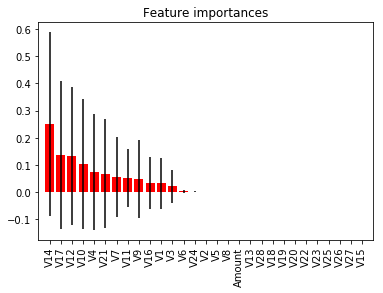

In [43]:
# Print the feature ranking
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(u_train_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(u_train_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(u_train_X.shape[1]), u_train_X.columns[indices], rotation=90)
plt.xlim([-1,u_train_X.shape[1]])
plt.show()
